In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from os import getcwd
import numpy as np
import os

import sys

In [4]:
home_path = os.path.join(getcwd(), '..','..','..')
data_path = os.path.join(home_path, 'seaa-energy','integrate-data','data')

sys.path.append(os.path.join(home_path, 'helpers'))
import visualization as viz
reload(viz)

<module 'visualization' from 'C:\\Users\\ohjartarson\\Code\\se_advanced_analytics\\seaa-energy\\commodities-intercorrelation\\notebooks\\..\\..\\..\\helpers\\visualization.py'>

In [63]:
df_gas = pd.read_csv(os.path.join(data_path, 'ICE Dutch TTF Natural Gas Futures Historical Data.csv'))
df_oil = pd.read_csv(os.path.join(data_path, 'Brent Oil Futures Historical Data.csv'))
df_emi = pd.read_csv(os.path.join(data_path, 'Carbon Emissions Futures Historical Data.csv'))
df_coal = pd.read_csv(os.path.join(data_path, 'Rotterdam Coal Futures Historical Data.csv'))
df_coal2 = pd.read_csv(os.path.join(data_path, 'Coal Futures Historical Data.csv'))

df_heat_oil = pd.read_csv(os.path.join(data_path, 'Heating Oil Futures Historical Data.csv'))
df_gas_oil = pd.read_csv(os.path.join(data_path, 'London Gas Oil Futures Historical Data.csv'))
df_ura = pd.read_csv(os.path.join(data_path, 'URA Historical Data.csv'))
df_gas2 = pd.read_csv(os.path.join(data_path, 'Natural Gas Futures Historical Data.csv'))

df_price = pd.read_pickle(os.path.join(data_path, 'df_price_day_ahead.pkl'), compression='gzip')
df_gen = pd.read_pickle(os.path.join(data_path, 'df_generation_type.pkl'), compression='gzip')
df_load = pd.read_pickle(os.path.join(data_path, 'df_load.pkl'), compression='gzip')

#------------------------------------
df_gas['Date'] = pd.to_datetime(df_gas['Date'], format = '%m/%d/%Y')
df_oil['Date'] = pd.to_datetime(df_oil['Date'], format = '%m/%d/%Y')
df_emi['Date'] = pd.to_datetime(df_emi['Date'], format = '%m/%d/%Y')
df_coal['Date'] = pd.to_datetime(df_coal['Date'], format = '%m/%d/%Y')
df_coal2['Date'] = pd.to_datetime(df_coal['Date'], format = '%m/%d/%Y')

df_heat_oil['Date'] = pd.to_datetime(df_heat_oil['Date'], format = '%m/%d/%Y')
df_gas_oil['Date'] = pd.to_datetime(df_gas_oil['Date'], format = '%m/%d/%Y')
df_ura['Date'] = pd.to_datetime(df_ura['Date'])
df_gas2['Date'] = pd.to_datetime(df_gas2['Date'], format = '%m/%d/%Y')

#------------------------------------
df_gas = df_gas.groupby('Date')['Price'].mean().rename('Natural Gas')
df_oil = df_oil.groupby('Date')['Price'].mean().rename('Brent Oil')
df_emi = df_emi.groupby('Date')['Price'].mean().rename('Carbon')
df_coal = df_coal.groupby('Date')['Price'].mean().rename('Coal')
df_coal2 = df_coal2.groupby('Date')['Price'].mean().rename('Coal2')

df_heat_oil = df_heat_oil.groupby('Date')['Price'].mean().rename('Heating Oil')
df_gas_oil['Price'] = df_gas_oil['Price'].str.replace(',', '')
df_gas_oil = df_gas_oil.groupby('Date')['Price'].mean().rename('Gas Oil')
df_ura = df_ura.groupby('Date')['Price'].mean().rename('Uranium')
df_gas2 = df_gas2.groupby('Date')['Price'].mean().rename('Gas2')


df_electricity = df_price.mean(axis=1).groupby(pd.to_datetime(df_price.index.date)).mean().rolling(7).mean().rename('Electricity').dropna()
df_wind = df_gen['SE_3']['Wind Onshore'].groupby(pd.to_datetime(df_gen['SE_3']['Wind Onshore'].index.date)).mean().rolling(1).mean().rename('Wind').dropna()
df_load = df_load['SE_3'].groupby(pd.to_datetime(df_load['SE_3'].index.date)).mean().rolling(1).mean().rename('Load').dropna()
#df_electricity = df_electricity[df_electricity.index>='2018-01-01']
df_wind = df_wind[df_wind.index>='2018-01-01']
df_load = df_load[df_load.index>='2018-01-01']

In [64]:
df_all = pd.concat([df_gas, df_oil, df_emi, df_coal, df_electricity, df_heat_oil, df_gas_oil, df_ura, df_gas2, df_coal2], axis=1).bfill()
df_all = df_all.div(df_all.iloc[0]).mul(1)
df_all

,Natural Gas,Brent Oil,Carbon,Coal,Electricity,Heating Oil,Gas Oil,Uranium,Gas2,Coal2
2016-01-04,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
2016-01-05,1.012256,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
2016-01-06,1.035673,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
2016-01-07,1.063198,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
2016-01-08,1.011024,1.0,1.0,1.0,1.087656,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-01-21,4.518932,NaN,NaN,NaN,4.874294,NaN,NaN,NaN,NaN,NaN
2023-01-22,4.518932,NaN,NaN,NaN,5.452457,NaN,NaN,NaN,NaN,NaN
2023-01-23,4.518932,NaN,NaN,NaN,5.842863,NaN,NaN,NaN,NaN,NaN
2023-01-24,4.019172,NaN,NaN,NaN,6.145339,NaN,NaN,NaN,NaN,NaN


In [110]:
df_el = df_price.groupby(pd.to_datetime(df_price.index.date)).mean().rolling(7).mean().ffill().bfill()
df_el.div(df_el.mean(axis=1), axis = 0)

,AT,BE,DE_LU,DK_1,DK_2,EE,FI,FR,LT,LV,NL,NO_1,NO_2,NO_3,NO_4,PL,SE_1,SE_2,SE_3,SE_4
2016-01-01,1.719564,0.795112,1.441456,0.516880,0.672864,0.862468,0.862468,0.786020,1.158337,1.158337,0.836479,0.665560,0.544874,0.671580,0.668590,3.951168,0.671258,0.671258,0.672864,0.672864
2016-01-02,1.719564,0.795112,1.441456,0.516880,0.672864,0.862468,0.862468,0.786020,1.158337,1.158337,0.836479,0.665560,0.544874,0.671580,0.668590,3.951168,0.671258,0.671258,0.672864,0.672864
2016-01-03,1.719564,0.795112,1.441456,0.516880,0.672864,0.862468,0.862468,0.786020,1.158337,1.158337,0.836479,0.665560,0.544874,0.671580,0.668590,3.951168,0.671258,0.671258,0.672864,0.672864
2016-01-04,1.719564,0.795112,1.441456,0.516880,0.672864,0.862468,0.862468,0.786020,1.158337,1.158337,0.836479,0.665560,0.544874,0.671580,0.668590,3.951168,0.671258,0.671258,0.672864,0.672864
2016-01-05,1.719564,0.795112,1.441456,0.516880,0.672864,0.862468,0.862468,0.786020,1.158337,1.158337,0.836479,0.665560,0.544874,0.671580,0.668590,3.951168,0.671258,0.671258,0.672864,0.672864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,1.034738,0.918042,0.946787,0.825498,0.828597,1.380580,1.380580,1.187135,1.380580,1.380580,0.888500,0.704703,0.704703,0.362647,0.258342,1.064353,1.181418,1.181418,1.193865,1.196935
2022-11-26,1.031750,0.915391,0.944053,0.823114,0.826204,1.376594,1.376594,1.183707,1.376594,1.376594,0.885934,0.702668,0.702668,0.361599,0.257596,1.061279,1.167607,1.167607,1.228089,1.234359
2022-11-27,1.045248,0.927367,0.956404,0.833883,0.837013,1.394604,1.394604,1.199193,1.394604,1.394604,0.897525,0.711861,0.711861,0.366330,0.260966,1.075164,1.110105,1.110105,1.187064,1.191491
2022-11-28,1.056532,0.937378,0.966729,0.842885,0.846049,1.409659,1.409659,1.212139,1.409659,1.409659,0.907214,0.719546,0.719546,0.370285,0.263783,1.086771,1.067774,1.067774,1.146242,1.150717


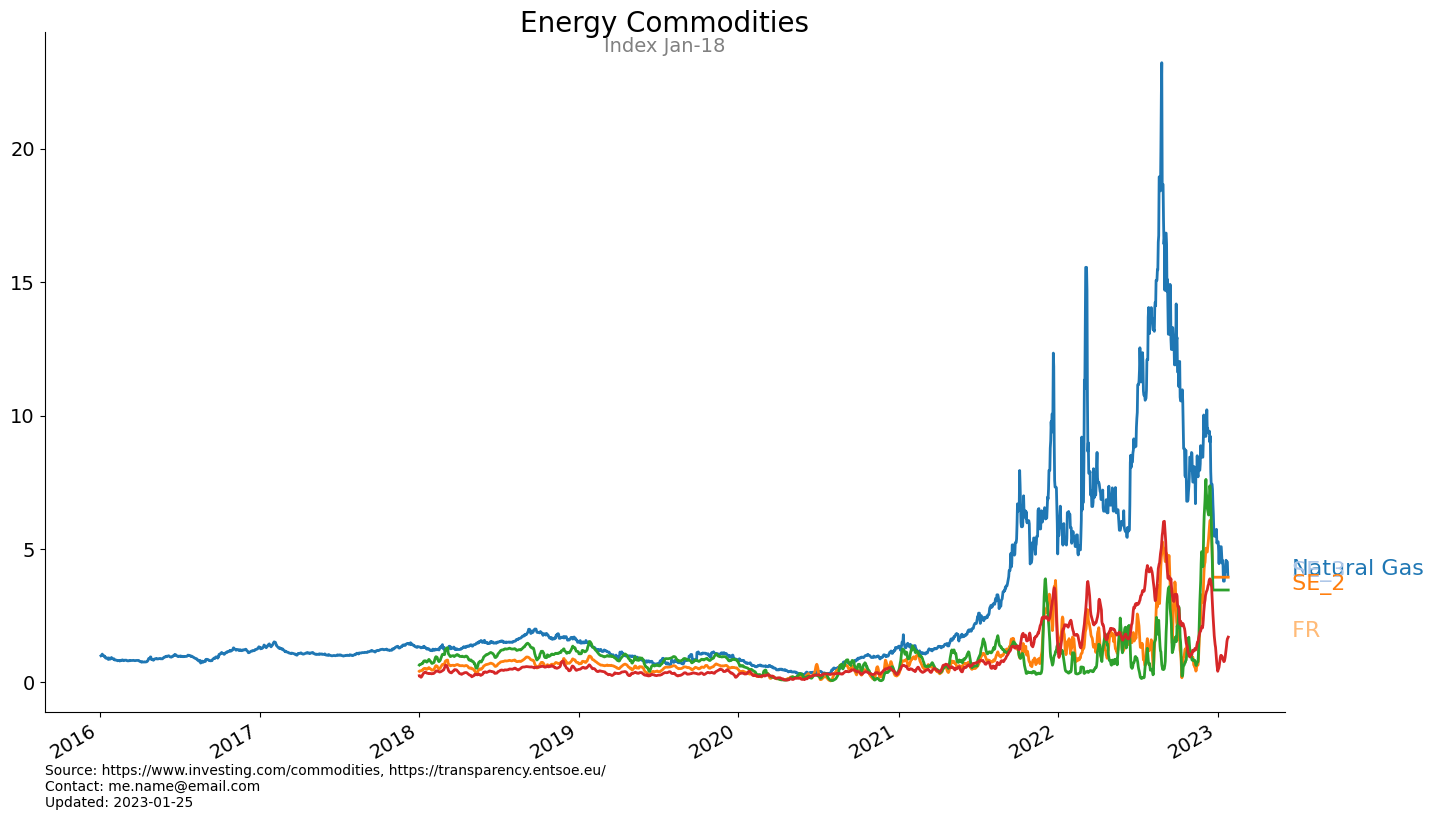

In [10]:

df_el = df_price.groupby(pd.to_datetime(df_price.index.date)).mean().rolling(7).mean().ffill().bfill()
#df_el = df_el.div(df_el.mean(axis=1), axis = 0)
df_el = df_el[df_el.index >= '2018-01-01'].div(df_el[df_el.index.year == 2021].mean()).mul(1)

df_plot = pd.concat([df_all['Natural Gas'], df_el[['SE_3', 'SE_2', 'FR']]], axis=1)
last_date = str(df_plot.index[-1].date())
ax = viz.make_figure(caption_notes = "Updated: " + last_date, title = "Energy Commodities", title_below = "Index Jan-18", 
                     caption_source = 'https://www.investing.com/commodities, https://transparency.entsoe.eu/')

df_plot.plot(ax=ax, legend=False, lw=2)
viz.put_legend_right(ax, df_plot)
plt.show()

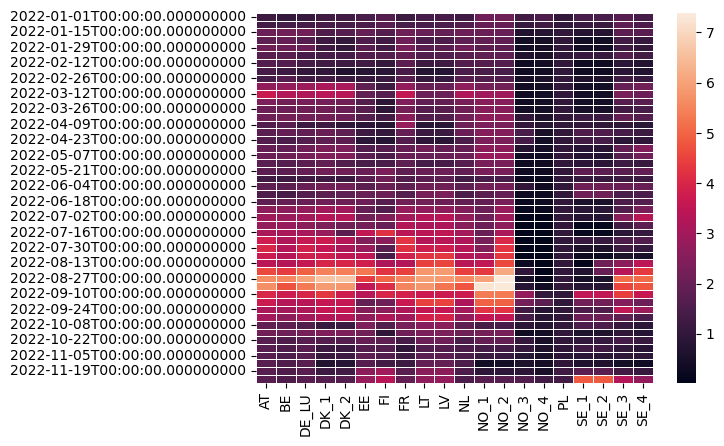

[]

In [72]:
a = df_el[df_el.index.year ==2022].iloc[::7, :]
#plt.imshow(a, cmap='hot', interpolation='nearest')


import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(a, linewidth=0.5)
plt.show()
ax.set_yticks([])

Text(0, 0.5, 'Log Index')

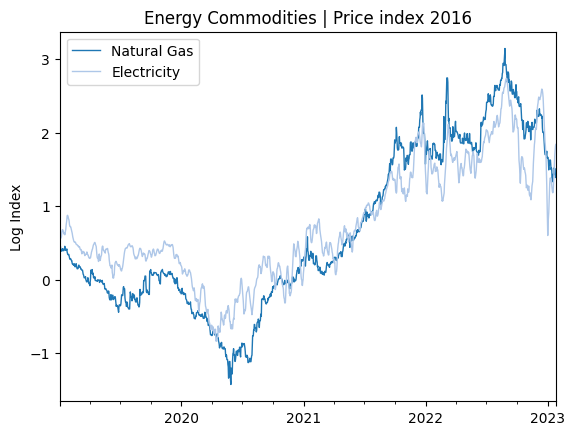

In [67]:
columns = ['Natural Gas','Carbon', 'Electricity','Heating Oil', 'Coal']
columns = ['Natural Gas', 'Electricity']

df_plot = df_all.loc[df_all.index>'2019',columns].apply(np.log)
last_date = str(df_plot.index[-1].date())
#ax = viz.make_figure(caption_notes = "Updated: " + last_date, title = "Energy Commodities", title_below = "Index Jan-16", figsize = (14, 9),
#                     caption_source = 'https://www.investing.com/commodities, https://transparency.entsoe.eu/')

ax = df_plot.plot(legend=True, lw=1, title = 'Energy Commodities | Price index 2016')
#viz.put_legend_right(ax, df_plot)
ax.set_ylabel('Log Index')
#df_plot.loc[['2022-12-14'], 'Electricity'].plot(ax=ax, marker='o', ms=4, c='r')
#ax.text('2022-12-14', df_plot.loc['2022-12-14', 'Electricity'], s='Valpens elräkning')
#plt.show()


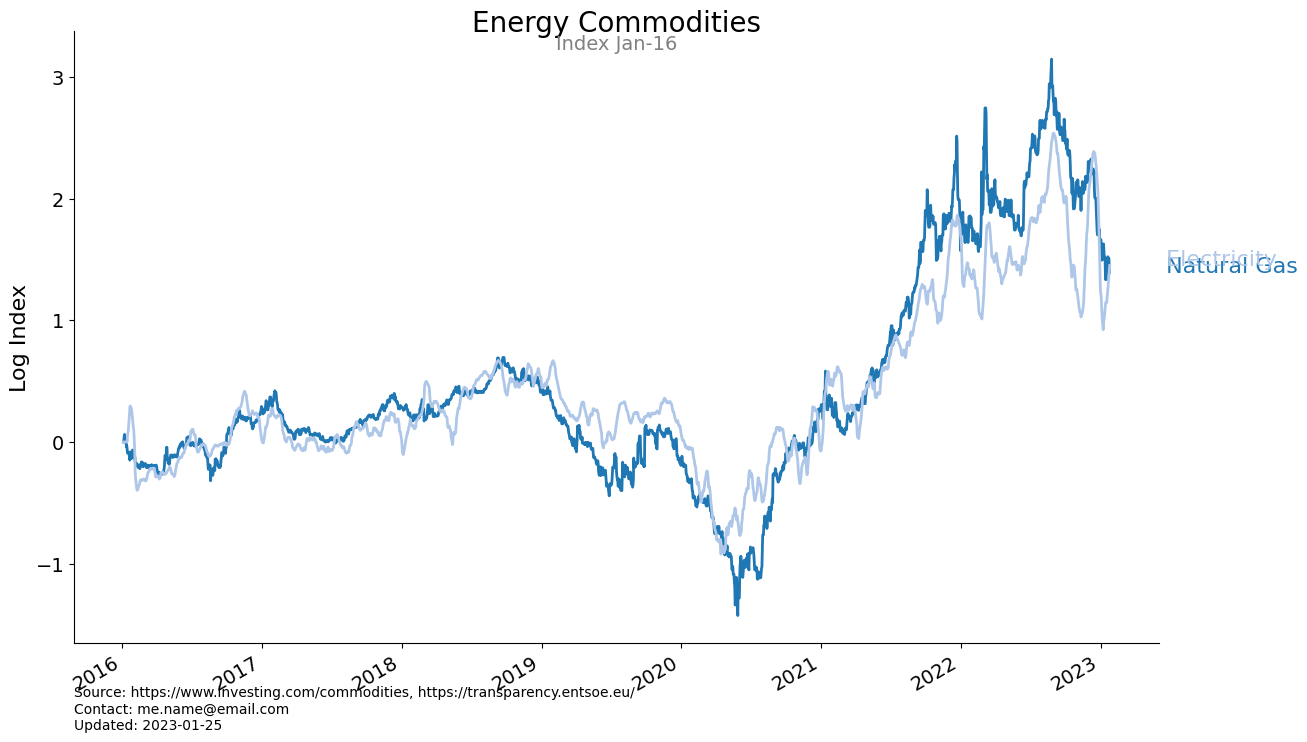

In [28]:
columns = ['Natural Gas','Carbon', 'Electricity','Heating Oil', 'Coal']
columns = ['Natural Gas', 'Electricity']

df_plot = df_all[columns].apply(np.log)
last_date = str(df_plot.index[-1].date())
ax = viz.make_figure(caption_notes = "Updated: " + last_date, title = "Energy Commodities", title_below = "Index Jan-16", figsize = (14, 9),
                     caption_source = 'https://www.investing.com/commodities, https://transparency.entsoe.eu/')

df_plot.plot(ax=ax, legend=False, lw=2)
viz.put_legend_right(ax, df_plot)
ax.set_ylabel('Log Index')
plt.show()


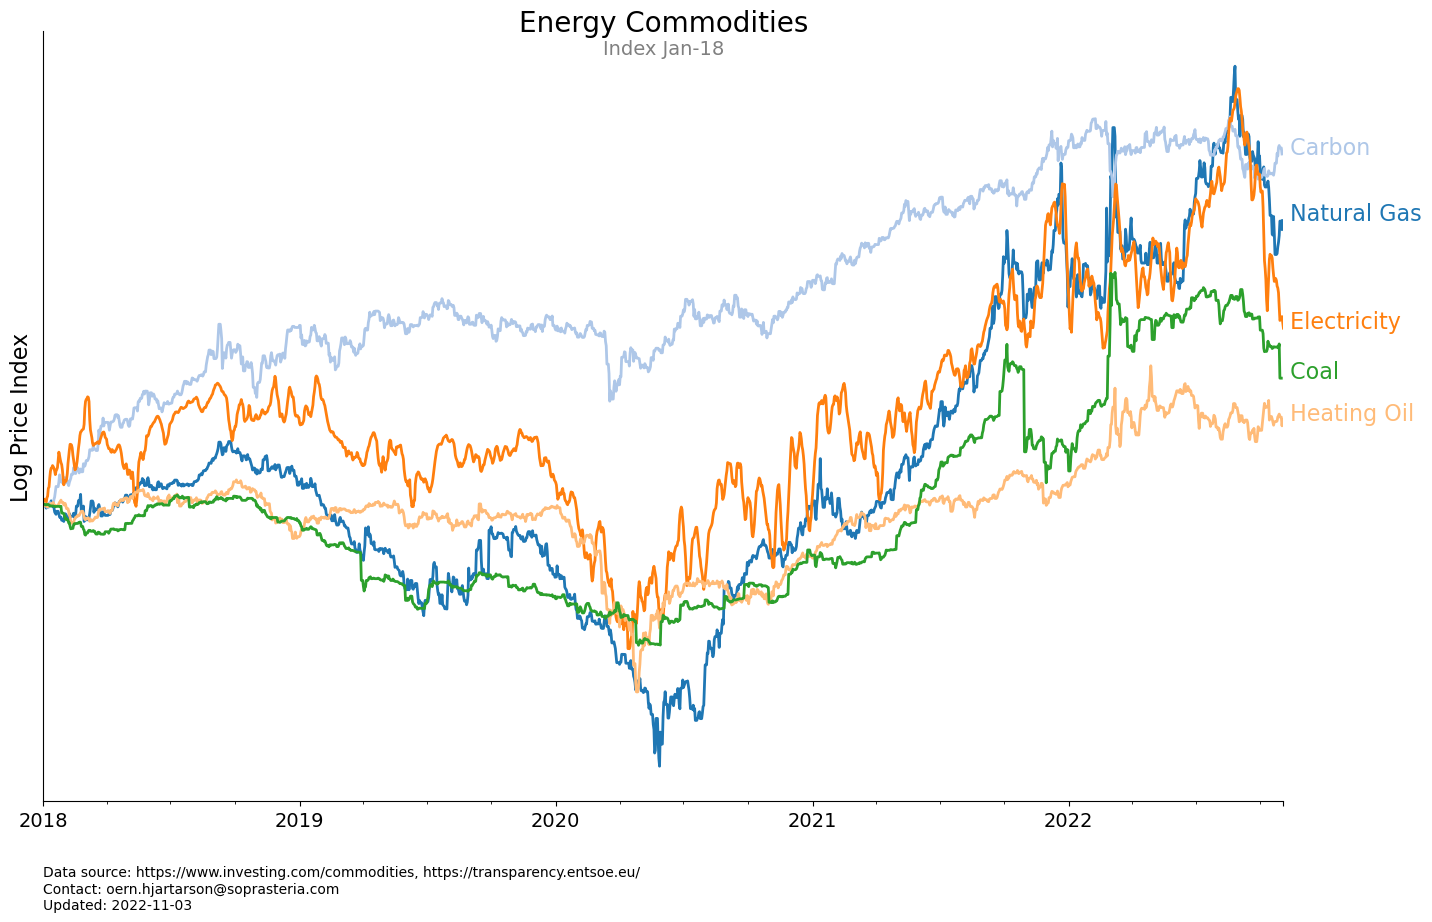

In [23]:
reload(viz)
import numpy as np

columns = ['Natural Gas','Carbon', 'Electricity','Heating Oil', 'Coal']

df_plot = df_all[columns].apply(np.log10)
last_date = str(df_plot.index[-1].date())
ax = viz.make_figure(caption_notes = "Updated: " + last_date, title = "Energy Commodities", title_below = "Index Jan-18", 
                     caption_source = 'https://www.investing.com/commodities, https://transparency.entsoe.eu/')

df_plot.plot(ax=ax, legend=False, lw=2)
viz.put_legend_right(ax, df_plot)
ax.set_yticks([])

ax.set_ylabel('Log Price Index')
plt.show()

In [176]:
df_omx = pd.read_csv(os.path.join(data_path, 'S&P 500 Historical Data.csv'))
df_omx_e = pd.read_csv(os.path.join(data_path, 'S&P 500 Historical Data from 1993.csv'))

df_omx['Date'] = pd.to_datetime(df_omx['Date'], format = '%m/%d/%Y')
df_omx = df_omx.set_index('Date').sort_index()
df_omx_e['Date'] = pd.to_datetime(df_omx_e['Date'], format = '%m/%d/%Y')
df_omx_e = df_omx_e.set_index('Date').sort_index()
df_omx = df_omx_e.combine_first(df_omx)
df_omx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7535 entries, 1993-01-04 to 2022-12-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     7535 non-null   object 
 1   Open      7535 non-null   object 
 2   High      7535 non-null   object 
 3   Low       7535 non-null   object 
 4   Vol.      0 non-null      float64
 5   Change %  7535 non-null   object 
dtypes: float64(1), object(5)
memory usage: 412.1+ KB


In [177]:
cols = ['Price','Open','High','Low']
df_omx['pct_change'] = df_omx['Change %'].str.replace('%', '').astype('float').mul(0.01).add(1)
df_omx['Close'] = df_omx['Price'].str.replace(',', '').astype('float')
df_omx['Open'] = df_omx['Open'].str.replace(',', '').astype('float')
df_omx

,Price,Open,High,Low,Vol.,Change %,pct_change,Close
Date,,,,,,,,
1993-01-04,435.40,435.70,437.30,434.50,NaN,-0.07%,0.9993,435.40
1993-01-05,434.30,435.30,435.40,433.60,NaN,-0.25%,0.9975,434.30
1993-01-06,434.50,434.30,435.20,432.50,NaN,0.05%,1.0005,434.50
1993-01-07,430.70,434.50,435.50,429.80,NaN,-0.87%,0.9913,430.70
1993-01-08,429.10,430.70,430.70,426.90,NaN,-0.37%,0.9963,429.10
...,...,...,...,...,...,...,...,...
2022-11-25,"4,026.12",4023.34,"4,034.02","4,020.76",NaN,-0.03%,0.9997,4026.12
2022-11-28,"3,963.94",4005.36,"4,012.27","3,955.77",NaN,-1.54%,0.9846,3963.94
2022-11-29,"3,957.63",3964.19,"3,976.77","3,937.65",NaN,-0.16%,0.9984,3957.63


In [217]:
df_omx['Open'] = df_omx['Close'].div(df_omx['Open'])
df_omx['Closed'] = df_omx['Open'].div(df_omx['Close'].shift(1))

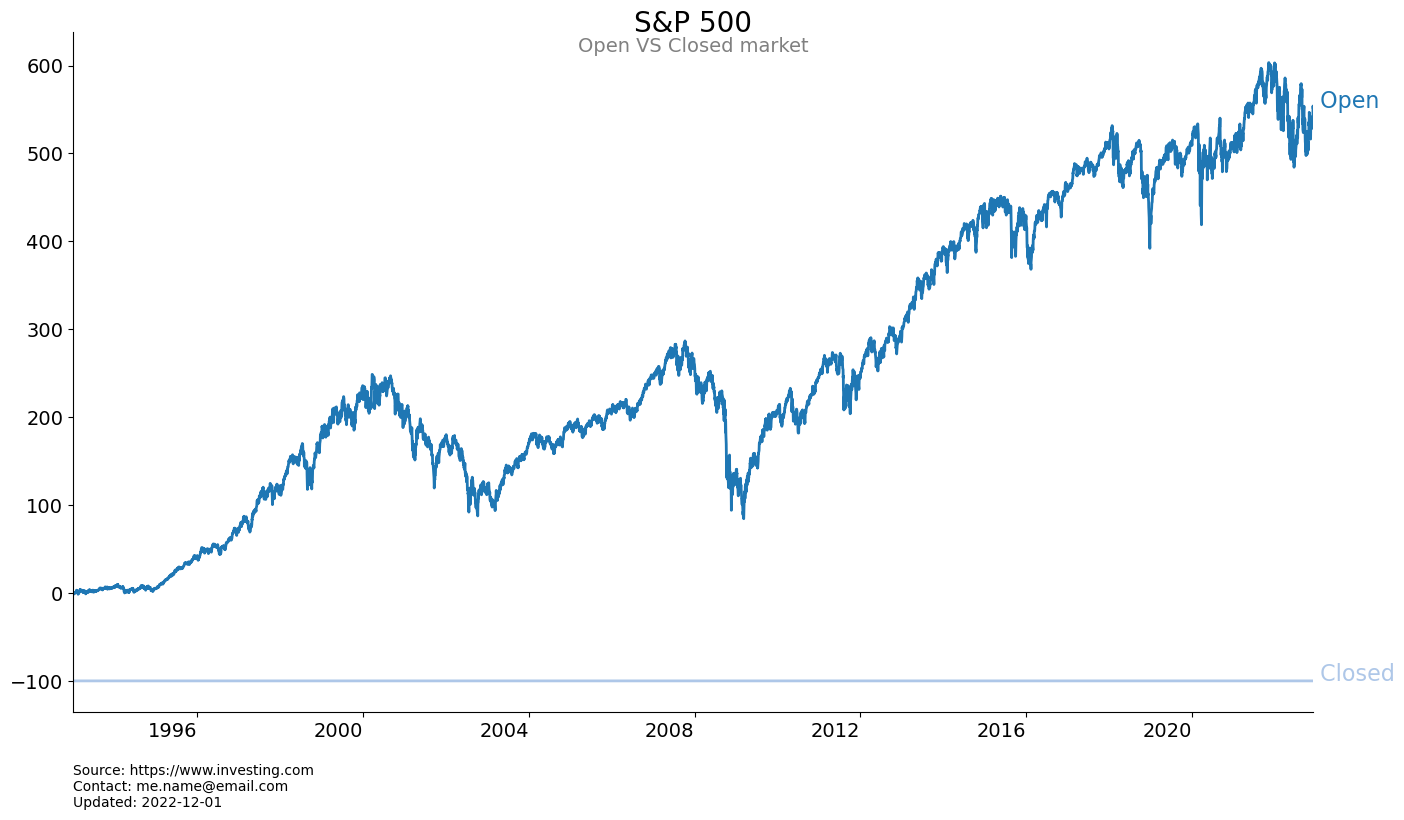

In [218]:
df_plot = df_omx[(df_omx.index>='1993')][['Open','Closed']].cumprod().sub(1).mul(100).dropna()

x_max = df_plot.index.max()
x_min = df_plot.index.min()
viz.set_color('tab20')
last_date = str(df_plot.index[-1].date())
ax = viz.make_figure(caption_notes = "Updated: "+last_date, title = "S&P 500", title_below = "Open VS Closed market", 
                     caption_source = 'https://www.investing.com')

df_plot.plot(ax=ax, legend=False, lw=2, rot = 0)
viz.put_legend_right(ax, df_plot, color='tab20')
ax.set_xlim([x_min, x_max])
ax.set_xlabel('')
plt.show()
#ax.set_yticks([])

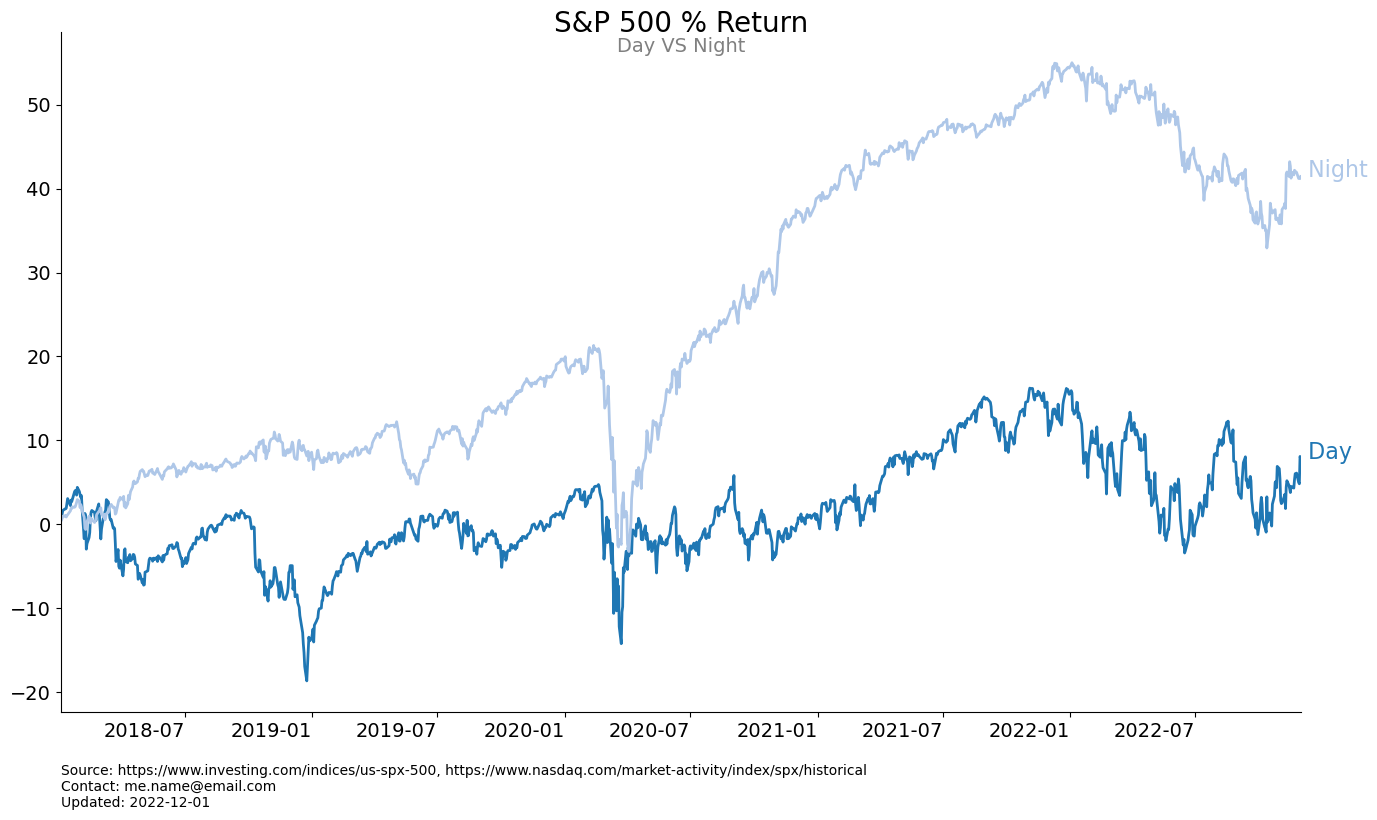

In [215]:
df_plot = df_omx[(df_omx.index>='1993')][['Day','Night']].rolling(100).apply(np.prod).sub(1).mul(100).dropna()
df_plot = df_omx[(df_omx.index>='2018-01-01')][['Day','Night']].cumprod().sub(1).mul(100).dropna()


x_max = df_plot.index.max()
x_min = df_plot.index.min()
viz.set_color('tab20')
last_date = str(df_plot.index[-1].date())
ax = viz.make_figure(caption_notes = "Updated: "+last_date, title = "S&P 500 % Return", title_below = "Day VS Night", 
                     caption_source = 'https://www.investing.com/indices/us-spx-500, https://www.nasdaq.com/market-activity/index/spx/historical')

df_plot.plot(ax=ax, legend=False, lw=2, rot = 0)
viz.put_legend_right(ax, df_plot, color='tab20')
ax.set_xlim([x_min, x_max])
ax.set_xlabel('')
plt.show()
#ax.set_yticks([])

In [193]:
df_sp = pd.read_csv(os.path.join(data_path, 'HistoricalData_SPX.csv'))
df_sp['Date'] = pd.to_datetime(df_sp['Date'], format = '%m/%d/%Y')
df_sp = df_sp.set_index('Date').sort_index()
df_sp = df_sp.rename(columns = {'Close/Last': 'Close'})
df_sp

,Close,Volume,Open,High,Low
Date,,,,,
2012-12-03,1409.46,--,1416.34,1423.73,1408.46
2012-12-04,1407.05,--,1409.46,1413.14,1403.65
2012-12-05,1409.28,--,1407.05,1415.56,1398.23
2012-12-06,1413.94,--,1409.43,1413.95,1405.93
2012-12-07,1418.07,--,1413.95,1420.34,1410.90
...,...,...,...,...,...
2022-11-25,4026.12,--,4023.34,4034.02,4020.76
2022-11-28,3963.94,--,4005.36,4012.27,3955.77
2022-11-29,3957.63,--,3964.19,3976.77,3937.65


In [208]:
df_sp[['Open', 'Close']] = df_sp[['Open', 'Close']].replace(0, np.nan)

df_sp['Day'] = df_sp['Close'].div(df_sp['Open'])
df_sp['CloseYesterday'] = df_sp['Close'].shift(1)
df_sp['Night'] = df_sp['Open'].div(df_sp['CloseYesterday'])
df_sp

,Close,Volume,Open,High,Low,Day,Night,CloseYesterday
Date,,,,,,,,
2012-12-03,1409.46,--,1416.34,1423.73,1408.46,0.995142,NaN,NaN
2012-12-04,1407.05,--,1409.46,1413.14,1403.65,0.998290,1.000000,1409.46
2012-12-05,1409.28,--,1407.05,1415.56,1398.23,1.001585,1.000000,1407.05
2012-12-06,1413.94,--,1409.43,1413.95,1405.93,1.003200,1.000106,1409.28
2012-12-07,1418.07,--,1413.95,1420.34,1410.90,1.002914,1.000007,1413.94
...,...,...,...,...,...,...,...,...
2022-11-25,4026.12,--,4023.34,4034.02,4020.76,1.000691,0.999027,4027.26
2022-11-28,3963.94,--,4005.36,4012.27,3955.77,0.989659,0.994844,4026.12
2022-11-29,3957.63,--,3964.19,3976.77,3937.65,0.998345,1.000063,3963.94


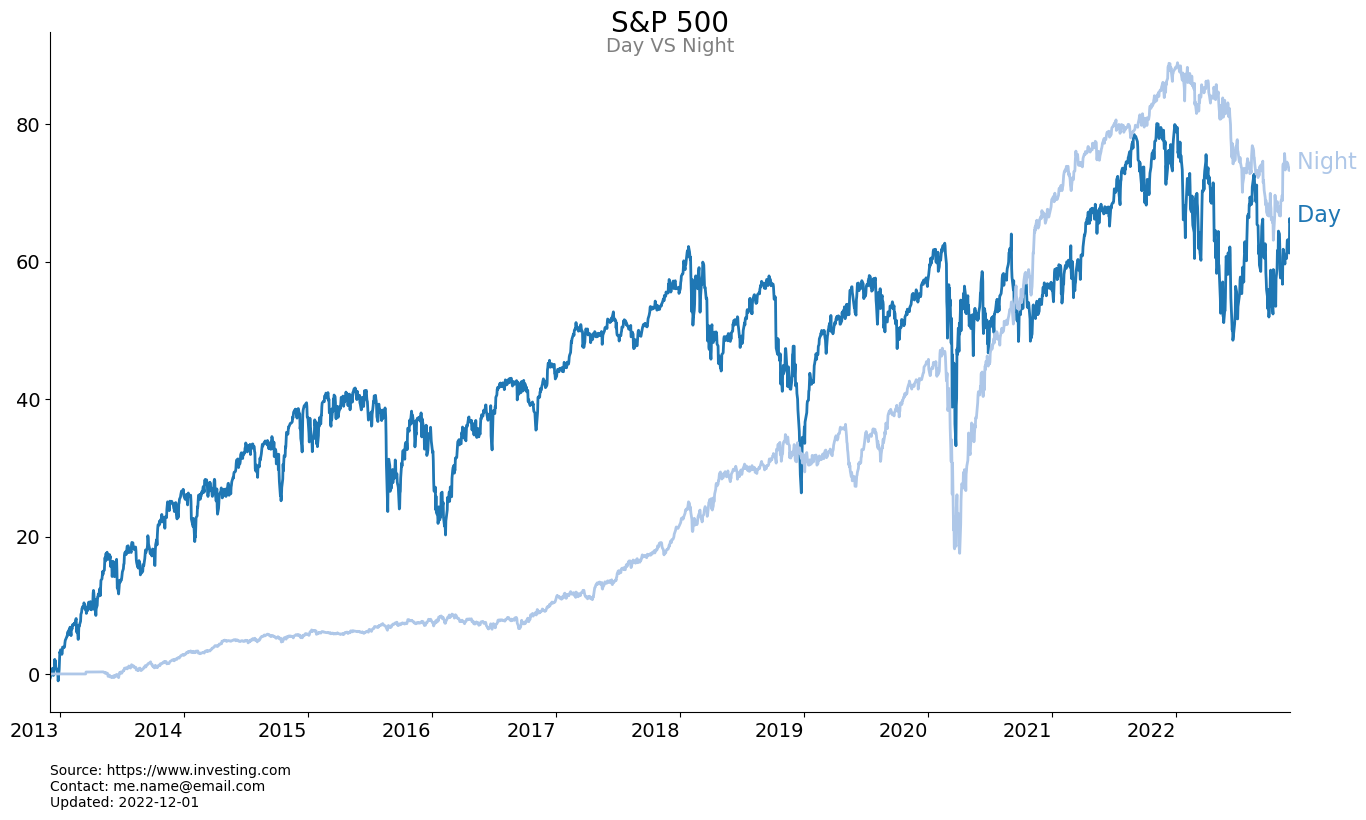

In [206]:
df_plot = df_sp[(df_sp.index>='1993')][['Day','Night']].rolling(100).apply(np.prod).sub(1).mul(100).dropna()
df_plot = df_sp[(df_sp.index>='1993')][['Day','Night']].cumprod().sub(1).mul(100).dropna()


x_max = df_plot.index.max()
x_min = df_plot.index.min()
viz.set_color('tab20')
last_date = str(df_plot.index[-1].date())
ax = viz.make_figure(caption_notes = "Updated: "+last_date, title = "S&P 500", title_below = "Day VS Night", 
                     caption_source = 'https://www.investing.com')

df_plot.plot(ax=ax, legend=False, lw=2, rot = 0)
viz.put_legend_right(ax, df_plot, color='tab20')
ax.set_xlim([x_min, x_max])
ax.set_xlabel('')
plt.show()
#ax.set_yticks([])

In [203]:
df_sp[df_sp['Open']==0].replace(0, np.nan)

,Close,Volume,Open,High,Low,Day,Night
Date,,,,,,,
2012-12-25,1426.66,--,NaN,NaN,NaN,inf,NaN
2013-01-01,1426.19,--,NaN,NaN,NaN,inf,NaN
2013-01-21,1485.98,--,NaN,NaN,NaN,inf,NaN
2013-02-18,1519.79,--,NaN,NaN,NaN,inf,NaN
2013-03-29,1569.19,--,NaN,NaN,NaN,inf,NaN
2013-05-27,1649.60,--,NaN,NaN,NaN,inf,NaN
2013-07-04,1615.41,--,NaN,NaN,NaN,inf,NaN
2013-09-02,1632.97,--,NaN,NaN,NaN,inf,NaN
2013-11-28,1807.23,--,NaN,NaN,NaN,inf,NaN
